# Task 1 

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

In [44]:
import pandas as pd
import seaborn as sn
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Reading data from Given Link
url = "http://bit.ly/w-data"
Data_frame= pd.read_csv(url)

# EDA

In [3]:
Data_frame.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
Data_frame.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
Data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
Data_frame.isnull().sum()

Hours     0
Scores    0
dtype: int64

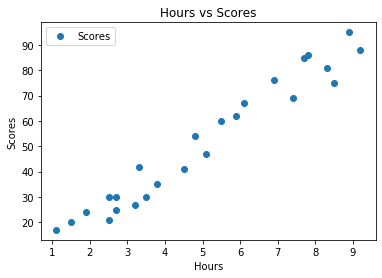

In [9]:
Data_frame.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

<BarContainer object of 25 artists>

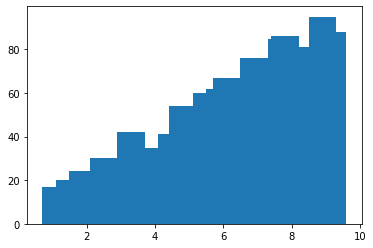

In [14]:
plt.bar(Data_frame['Hours'], Data_frame['Scores'], label = 'Bar', align='center',)

# Data Preparation

In [15]:
from sklearn.model_selection import train_test_split

In [22]:
X = Data_frame.iloc[:, :-1].values  
y = Data_frame.iloc[:, 1].values 

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# Model

In [25]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

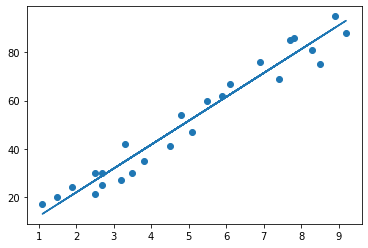

In [27]:
Solution = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, Solution)
plt.show()

In [32]:
regressor.score(X,y) #training error

0.9526947647057274

# prediction

In [28]:
y_pred = regressor.predict(X_test)

In [29]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [30]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


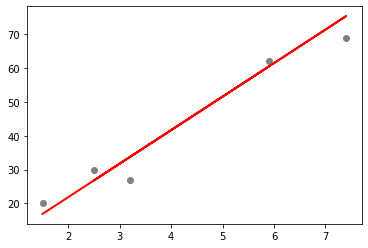

In [34]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [38]:
hours = ([[9.25]])
own_pred = regressor.predict(hours)
print("No of Hours = ",hours)
print("Predicted Score ",own_pred[0])

No of Hours =  [[9.25]]
Predicted Score  93.69173248737538


In [48]:
hours = ([[5.25]])
own_pred = regressor.predict(hours)
print("No of Hours = ",hours)
print("Predicted Score ",own_pred[0])

No of Hours =  [[5.25]]
Predicted Score  54.04910656480642


In [47]:
hours = ([[7.25]])
own_pred = regressor.predict(hours)
print("No of Hours = ",hours)
print("Predicted Score ",own_pred[0])

No of Hours =  [[7.25]]
Predicted Score  73.8704195260909


# Evaluating Algorithm Perfomance

In [41]:
from sklearn import metrics as m
print('The mean absolute error is :: ', m.mean_absolute_error(y_test,y_pred))
print('The mean squared error is :: ',m.mean_squared_error(y_test,y_pred))
print('The RMSE is :: ',np.sqrt(m.mean_squared_error(y_test,y_pred)))

The mean absolute error is ::  4.183859899002975
The mean squared error is ::  21.5987693072174
The RMSE is ::  4.6474476121003665
